# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [4]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [5]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [6]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [7]:
## 超參數設定
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95

## SGD

In [8]:
results = {}
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [============================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 8s 159us/step - loss: 1.8325 - acc: 0.3456 - val_loss: 1.7445 - val_acc: 0.3781
Epoch 2/50
50000/50000 [==============================] - 8s 154us/step - loss: 1.5997 - acc: 0.4318 - val_loss: 1.5744 - val_acc: 0.4360
Epoch 3/50
50000/50000 [==============================] - 8s 153us/step - loss: 1.5095 - acc: 0.4642 - val_loss: 1.5617 - val_acc: 0.4346
Epoch 4/50
50000/50000 [==============================] - 8s 153us/step - loss: 1.4499 - acc: 0.4839 - val_loss: 1.4843 - val_acc: 0.4619
Epoch 5/50
50000/50000 [==============================] - 8s 153us/step - loss: 1.3982 - acc: 0.5038 - val_loss: 1.4293 - val_acc: 0.4897
Epoch 6/50
50000/50000 [==============================] - 8s 156us/step - loss: 1.3609 - acc: 0.5162 - val_loss: 1.4553 - val_acc: 0.4803
Epoch 7/50
50000/50000 [==============================] - 8s 154us/step - loss: 1.3249 - acc: 0.5294 - val_loss: 1.4459 - 

Epoch 2/50
50000/50000 [==============================] - 8s 152us/step - loss: 1.8102 - acc: 0.3656 - val_loss: 1.7696 - val_acc: 0.3712
Epoch 3/50
50000/50000 [==============================] - 8s 152us/step - loss: 1.7245 - acc: 0.3964 - val_loss: 1.6986 - val_acc: 0.4032
Epoch 4/50
50000/50000 [==============================] - 8s 152us/step - loss: 1.6626 - acc: 0.4191 - val_loss: 1.6418 - val_acc: 0.4243
Epoch 5/50
50000/50000 [==============================] - 8s 153us/step - loss: 1.6136 - acc: 0.4339 - val_loss: 1.6275 - val_acc: 0.4230
Epoch 6/50
50000/50000 [==============================] - 8s 155us/step - loss: 1.5735 - acc: 0.4467 - val_loss: 1.5727 - val_acc: 0.4443
Epoch 7/50
50000/50000 [==============================] - 8s 152us/step - loss: 1.5398 - acc: 0.4605 - val_loss: 1.5534 - val_acc: 0.4459
Epoch 8/50
50000/50000 [==============================] - 8s 154us/step - loss: 1.5091 - acc: 0.4721 - val_loss: 1.5250 - val_acc: 0.4621
Epoch 9/50
50000/50000 [==========

50000/50000 [==============================] - 8s 158us/step - loss: 2.0229 - acc: 0.2914 - val_loss: 1.9905 - val_acc: 0.3023
Epoch 4/50
50000/50000 [==============================] - 8s 157us/step - loss: 1.9689 - acc: 0.3092 - val_loss: 1.9447 - val_acc: 0.3195
Epoch 5/50
50000/50000 [==============================] - 8s 158us/step - loss: 1.9291 - acc: 0.3253 - val_loss: 1.9104 - val_acc: 0.3305
Epoch 6/50
50000/50000 [==============================] - 8s 158us/step - loss: 1.8992 - acc: 0.3351 - val_loss: 1.8844 - val_acc: 0.3424
Epoch 7/50
50000/50000 [==============================] - 8s 160us/step - loss: 1.8747 - acc: 0.3425 - val_loss: 1.8624 - val_acc: 0.3481
Epoch 8/50
50000/50000 [==============================] - 8s 159us/step - loss: 1.8541 - acc: 0.3516 - val_loss: 1.8455 - val_acc: 0.3527
Epoch 9/50
50000/50000 [==============================] - 8s 160us/step - loss: 1.8369 - acc: 0.3568 - val_loss: 1.8289 - val_acc: 0.3573
Epoch 10/50
50000/50000 [====================

50000/50000 [==============================] - 8s 157us/step - loss: 2.2677 - acc: 0.1729 - val_loss: 2.2590 - val_acc: 0.1841
Epoch 5/50
50000/50000 [==============================] - 8s 164us/step - loss: 2.2520 - acc: 0.1874 - val_loss: 2.2435 - val_acc: 0.1929
Epoch 6/50
50000/50000 [==============================] - 9s 178us/step - loss: 2.2367 - acc: 0.1961 - val_loss: 2.2287 - val_acc: 0.2018
Epoch 7/50
50000/50000 [==============================] - 8s 162us/step - loss: 2.2222 - acc: 0.2036 - val_loss: 2.2146 - val_acc: 0.2062
Epoch 8/50
50000/50000 [==============================] - 8s 159us/step - loss: 2.2086 - acc: 0.2114 - val_loss: 2.2014 - val_acc: 0.2109
Epoch 9/50
50000/50000 [==============================] - 8s 167us/step - loss: 2.1959 - acc: 0.2175 - val_loss: 2.1890 - val_acc: 0.2172
Epoch 10/50
50000/50000 [==============================] - 8s 162us/step - loss: 2.1841 - acc: 0.2246 - val_loss: 2.1775 - val_acc: 0.2242
Epoch 11/50
50000/50000 [===================

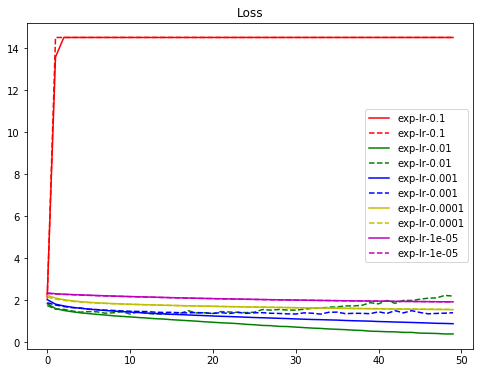

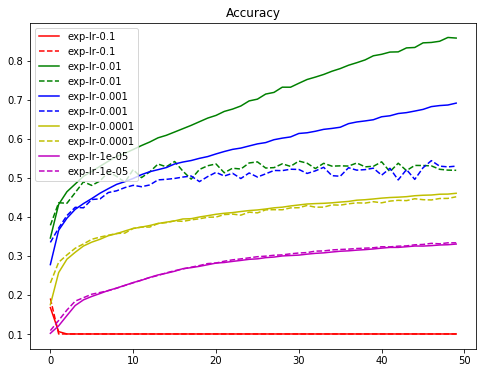

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

## RMSprop

In [11]:
results2 = {}
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model2 = build_mlp(input_shape=x_train.shape[1:])
    model2.summary()
    optimizer = keras.optimizers.RMSprop(lr=lr)
    model2.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model2.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model2.history.history["loss"]
    valid_loss = model2.history.history["val_loss"]
    train_acc = model2.history.history["acc"]
    valid_acc = model2.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results2[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [============================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 11s 211us/step - loss: 14.4458 - acc: 0.0999 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/50
50000/50000 [==============================] - 10s 193us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 10s 205us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 11s 214us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 10s 205us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 11s 211us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 11s 217us/step - loss: 14.5063 - acc: 0.1000 -

50000/50000 [==============================] - 10s 207us/step - loss: 2.2642 - acc: 0.2155 - val_loss: 1.9654 - val_acc: 0.2762
Epoch 2/50
50000/50000 [==============================] - 10s 195us/step - loss: 1.8982 - acc: 0.3147 - val_loss: 1.8877 - val_acc: 0.3016
Epoch 3/50
50000/50000 [==============================] - 11s 225us/step - loss: 1.7931 - acc: 0.3543 - val_loss: 1.7820 - val_acc: 0.3658
Epoch 4/50
50000/50000 [==============================] - 12s 236us/step - loss: 1.7226 - acc: 0.3836 - val_loss: 1.7607 - val_acc: 0.3619
Epoch 5/50
50000/50000 [==============================] - 11s 229us/step - loss: 1.6635 - acc: 0.4068 - val_loss: 1.8008 - val_acc: 0.3660
Epoch 6/50
50000/50000 [==============================] - 9s 180us/step - loss: 1.6119 - acc: 0.4232 - val_loss: 1.6178 - val_acc: 0.4107
Epoch 7/50
50000/50000 [==============================] - 9s 179us/step - loss: 1.5741 - acc: 0.4383 - val_loss: 1.6753 - val_acc: 0.3916
Epoch 8/50
50000/50000 [================

50000/50000 [==============================] - 9s 180us/step - loss: 1.7850 - acc: 0.3678 - val_loss: 1.7832 - val_acc: 0.3586
Epoch 3/50
50000/50000 [==============================] - 9s 178us/step - loss: 1.7041 - acc: 0.3972 - val_loss: 1.6832 - val_acc: 0.3936
Epoch 4/50
50000/50000 [==============================] - 9s 178us/step - loss: 1.6462 - acc: 0.4173 - val_loss: 1.7342 - val_acc: 0.3887
Epoch 5/50
50000/50000 [==============================] - 9s 178us/step - loss: 1.6059 - acc: 0.4310 - val_loss: 1.6121 - val_acc: 0.4197
Epoch 6/50
50000/50000 [==============================] - 9s 178us/step - loss: 1.5677 - acc: 0.4460 - val_loss: 1.5613 - val_acc: 0.4470
Epoch 7/50
50000/50000 [==============================] - 9s 179us/step - loss: 1.5354 - acc: 0.4580 - val_loss: 1.5857 - val_acc: 0.4246
Epoch 8/50
50000/50000 [==============================] - 9s 185us/step - loss: 1.5050 - acc: 0.4671 - val_loss: 1.5714 - val_acc: 0.4360
Epoch 9/50
50000/50000 [=====================

50000/50000 [==============================] - 9s 180us/step - loss: 1.8750 - acc: 0.3440 - val_loss: 1.8645 - val_acc: 0.3371
Epoch 4/50
50000/50000 [==============================] - 9s 180us/step - loss: 1.8314 - acc: 0.3605 - val_loss: 1.8160 - val_acc: 0.3672
Epoch 5/50
50000/50000 [==============================] - 9s 180us/step - loss: 1.7984 - acc: 0.3718 - val_loss: 1.8050 - val_acc: 0.3678
Epoch 6/50
50000/50000 [==============================] - 9s 180us/step - loss: 1.7721 - acc: 0.3816 - val_loss: 1.7734 - val_acc: 0.3731
Epoch 7/50
50000/50000 [==============================] - 10s 191us/step - loss: 1.7499 - acc: 0.3906 - val_loss: 1.7459 - val_acc: 0.3909
Epoch 8/50
50000/50000 [==============================] - 10s 194us/step - loss: 1.7303 - acc: 0.3982 - val_loss: 1.7372 - val_acc: 0.3910
Epoch 9/50
50000/50000 [==============================] - 10s 201us/step - loss: 1.7122 - acc: 0.4052 - val_loss: 1.7162 - val_acc: 0.3958
Epoch 10/50
50000/50000 [=================

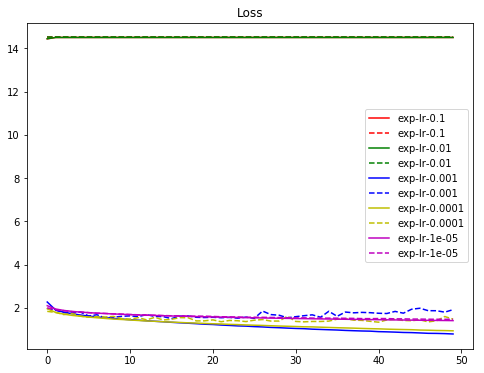

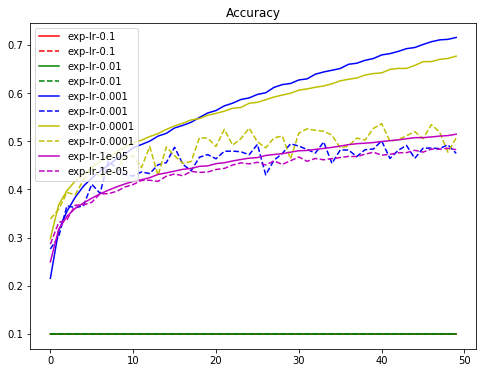

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results2.keys()):
    plt.plot(range(len(results2[cond]['train-loss'])),results2[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results2[cond]['valid-loss'])),results2[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results2.keys()):
    plt.plot(range(len(results2[cond]['train-acc'])),results2[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results2[cond]['valid-acc'])),results2[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

## AdaGrad

In [14]:
results3 = {}
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model3 = build_mlp(input_shape=x_train.shape[1:])
    model3.summary()
    optimizer = keras.optimizers.Adagrad(lr=lr)
    model3.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model3.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model3.history.history["loss"]
    valid_loss = model3.history.history["val_loss"]
    train_acc = model3.history.history["acc"]
    valid_acc = model3.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results3[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [============================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 9s 179us/step - loss: 7.7126 - acc: 0.1524 - val_loss: 2.0195 - val_acc: 0.2738
Epoch 2/50
50000/50000 [==============================] - 9s 172us/step - loss: 1.9186 - acc: 0.3047 - val_loss: 1.8378 - val_acc: 0.3393
Epoch 3/50
50000/50000 [==============================] - 9s 172us/step - loss: 1.7800 - acc: 0.3610 - val_loss: 1.7834 - val_acc: 0.3491
Epoch 4/50
50000/50000 [==============================] - 9s 173us/step - loss: 1.7049 - acc: 0.3923 - val_loss: 1.7486 - val_acc: 0.3749
Epoch 5/50
50000/50000 [==============================] - 9s 172us/step - loss: 1.6449 - acc: 0.4113 - val_loss: 1.7694 - val_acc: 0.3669
Epoch 6/50
50000/50000 [==============================] - 9s 173us/step - loss: 1.6047 - acc: 0.4265 - val_loss: 1.6760 - val_acc: 0.4017
Epoch 7/50
50000/50000 [==============================] - 9s 173us/step - loss: 1.5657 - acc: 0.4413 - val_loss: 1.6570 - 

Epoch 2/50
50000/50000 [==============================] - 9s 179us/step - loss: 1.7928 - acc: 0.3666 - val_loss: 1.7773 - val_acc: 0.3624
Epoch 3/50
50000/50000 [==============================] - 9s 183us/step - loss: 1.7254 - acc: 0.3908 - val_loss: 1.7962 - val_acc: 0.3522
Epoch 4/50
50000/50000 [==============================] - 9s 185us/step - loss: 1.6787 - acc: 0.4087 - val_loss: 1.6849 - val_acc: 0.4045
Epoch 5/50
50000/50000 [==============================] - 9s 187us/step - loss: 1.6440 - acc: 0.4233 - val_loss: 1.6849 - val_acc: 0.4033
Epoch 6/50
50000/50000 [==============================] - 11s 211us/step - loss: 1.6170 - acc: 0.4320 - val_loss: 1.6561 - val_acc: 0.4012
Epoch 7/50
50000/50000 [==============================] - 11s 213us/step - loss: 1.5938 - acc: 0.4414 - val_loss: 1.5930 - val_acc: 0.4355
Epoch 8/50
50000/50000 [==============================] - 10s 206us/step - loss: 1.5734 - acc: 0.4506 - val_loss: 1.5745 - val_acc: 0.4452
Epoch 9/50
50000/50000 [=======

50000/50000 [==============================] - 9s 176us/step - loss: 1.8764 - acc: 0.3506 - val_loss: 1.8635 - val_acc: 0.3518
Epoch 4/50
50000/50000 [==============================] - 9s 175us/step - loss: 1.8491 - acc: 0.3586 - val_loss: 1.8412 - val_acc: 0.3645
Epoch 5/50
50000/50000 [==============================] - 8s 169us/step - loss: 1.8293 - acc: 0.3661 - val_loss: 1.8245 - val_acc: 0.3679
Epoch 6/50
50000/50000 [==============================] - 9s 171us/step - loss: 1.8135 - acc: 0.3699 - val_loss: 1.8086 - val_acc: 0.3772
Epoch 7/50
50000/50000 [==============================] - 9s 170us/step - loss: 1.8002 - acc: 0.3759 - val_loss: 1.7998 - val_acc: 0.3768
Epoch 8/50
50000/50000 [==============================] - 8s 170us/step - loss: 1.7893 - acc: 0.3776 - val_loss: 1.7871 - val_acc: 0.3856
Epoch 9/50
50000/50000 [==============================] - 9s 176us/step - loss: 1.7794 - acc: 0.3819 - val_loss: 1.7784 - val_acc: 0.3877
Epoch 10/50
50000/50000 [====================

50000/50000 [==============================] - 10s 193us/step - loss: 2.1890 - acc: 0.2092 - val_loss: 2.1805 - val_acc: 0.2147
Epoch 5/50
50000/50000 [==============================] - 9s 180us/step - loss: 2.1744 - acc: 0.2196 - val_loss: 2.1673 - val_acc: 0.2204
Epoch 6/50
50000/50000 [==============================] - 9s 178us/step - loss: 2.1623 - acc: 0.2264 - val_loss: 2.1562 - val_acc: 0.2282
Epoch 7/50
50000/50000 [==============================] - 9s 183us/step - loss: 2.1519 - acc: 0.2335 - val_loss: 2.1465 - val_acc: 0.2371
Epoch 8/50
50000/50000 [==============================] - 9s 188us/step - loss: 2.1427 - acc: 0.2394 - val_loss: 2.1377 - val_acc: 0.2409
Epoch 9/50
50000/50000 [==============================] - 9s 175us/step - loss: 2.1344 - acc: 0.2449 - val_loss: 2.1298 - val_acc: 0.2456
Epoch 10/50
50000/50000 [==============================] - 9s 173us/step - loss: 2.1268 - acc: 0.2496 - val_loss: 2.1226 - val_acc: 0.2503
Epoch 11/50
50000/50000 [==================

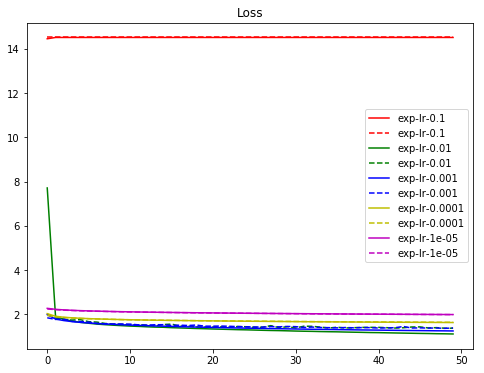

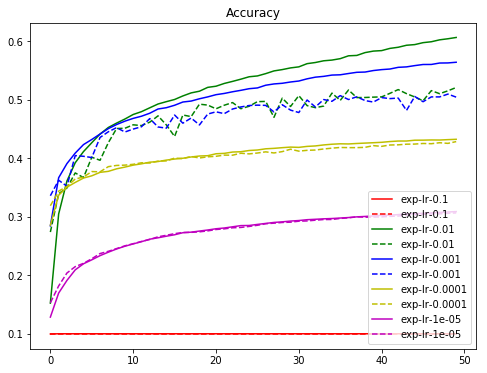

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results3.keys()):
    plt.plot(range(len(results3[cond]['train-loss'])),results3[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results3[cond]['valid-loss'])),results3[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results3.keys()):
    plt.plot(range(len(results3[cond]['train-acc'])),results3[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results3[cond]['valid-acc'])),results3[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

## Adam

In [16]:
results4 = {}
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model4 = build_mlp(input_shape=x_train.shape[1:])
    model4.summary()
    optimizer = keras.optimizers.Adam(lr=lr)
    model4.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model4.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model4.history.history["loss"]
    valid_loss = model4.history.history["val_loss"]
    train_acc = model4.history.history["acc"]
    valid_acc = model4.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results4[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [============================

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 18s 361us/step - loss: 1

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 21s 413us/step - loss: 1.9408 - acc: 0.2955 - val_loss: 1.8328 - val_acc: 0.3389
Epoch 2/50
50000/50000 [==============================] - 20s 401us/step - loss: 1.7229 - acc: 0.3807 - val_loss: 1.7120 - val_acc: 0.3882
Epoch 3/50
50000/50000 [==============================] - 20s 401us/step - loss: 1.6274 - acc: 0.4166 - val_loss: 1.5817 - val_acc: 0.4421
Epoch 4/50
50000/50000 [==============================] - 19s 372us/step - loss: 1.5654 - acc: 0.4404 - val_loss: 1.6218 - val_acc: 0.4180
Epoch 5/50
50000/50000 [==============================] - 19s 387us/step - loss: 1.5172 - acc: 0.4582 - val_loss: 1.5020 - val_acc: 0.4656
Epoch 6/50
50000/50000 [==============================] - 21s 412us/step - loss: 1.4708 - acc: 0.4757 - val_loss: 1.4908 - val_acc: 0.4758
Epoch 7/50
50000/50000 [==============================] - 19s 387us/step - loss: 1.4455 - acc: 0.4839 - val_loss: 1.

50000/50000 [==============================] - 21s 416us/step - loss: 1.8936 - acc: 0.3224 - val_loss: 1.7574 - val_acc: 0.3741
Epoch 2/50
50000/50000 [==============================] - 19s 382us/step - loss: 1.7059 - acc: 0.3980 - val_loss: 1.6545 - val_acc: 0.4169
Epoch 3/50
50000/50000 [==============================] - 19s 371us/step - loss: 1.6210 - acc: 0.4281 - val_loss: 1.5977 - val_acc: 0.4385
Epoch 4/50
50000/50000 [==============================] - 18s 365us/step - loss: 1.5691 - acc: 0.4457 - val_loss: 1.5709 - val_acc: 0.4391
Epoch 5/50
50000/50000 [==============================] - 18s 363us/step - loss: 1.5271 - acc: 0.4608 - val_loss: 1.5073 - val_acc: 0.4633
Epoch 6/50
50000/50000 [==============================] - 18s 365us/step - loss: 1.4871 - acc: 0.4747 - val_loss: 1.5226 - val_acc: 0.4603
Epoch 7/50
50000/50000 [==============================] - 20s 401us/step - loss: 1.4572 - acc: 0.4873 - val_loss: 1.4982 - val_acc: 0.4605
Epoch 8/50
50000/50000 [==============

Epoch 2/50
50000/50000 [==============================] - 18s 358us/step - loss: 1.9519 - acc: 0.3159 - val_loss: 1.9006 - val_acc: 0.3343
Epoch 3/50
50000/50000 [==============================] - 19s 389us/step - loss: 1.8693 - acc: 0.3480 - val_loss: 1.8416 - val_acc: 0.3561
Epoch 4/50
50000/50000 [==============================] - 20s 394us/step - loss: 1.8217 - acc: 0.3641 - val_loss: 1.8029 - val_acc: 0.3684
Epoch 5/50
50000/50000 [==============================] - 19s 378us/step - loss: 1.7858 - acc: 0.3765 - val_loss: 1.7746 - val_acc: 0.3852
Epoch 6/50
50000/50000 [==============================] - 18s 369us/step - loss: 1.7569 - acc: 0.3875 - val_loss: 1.7477 - val_acc: 0.3924
Epoch 7/50
50000/50000 [==============================] - 19s 374us/step - loss: 1.7321 - acc: 0.3955 - val_loss: 1.7270 - val_acc: 0.3987
Epoch 8/50
50000/50000 [==============================] - 18s 361us/step - loss: 1.7095 - acc: 0.4034 - val_loss: 1.7043 - val_acc: 0.4057
Epoch 9/50
50000/50000 [===

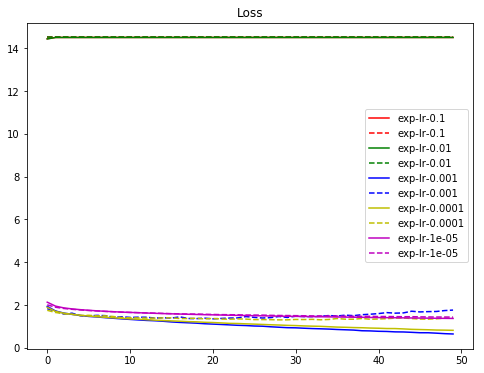

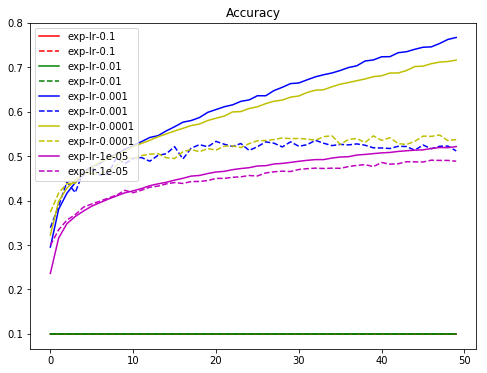

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results4.keys()):
    plt.plot(range(len(results4[cond]['train-loss'])),results4[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results4[cond]['valid-loss'])),results4[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results4.keys()):
    plt.plot(range(len(results4[cond]['train-acc'])),results4[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results4[cond]['valid-acc'])),results4[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()